<a href="https://colab.research.google.com/github/mevangelista-alvarado/neural_networks/blob/main/RedNeuronalConvolucional_Ejemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

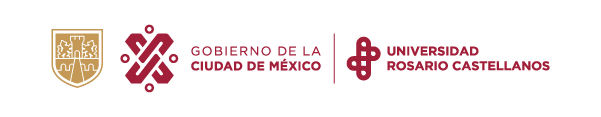

## Introducción

Mostramos un ejemplo simple de una red neuronal convolucional en `Python` (con `TensorFlow`), en el dataset de MNIST (con `sklearn`).

## Implementación en Python

#### Importación de bibliotecas

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importamos `TensorFlow` y otras bibliotecas necesarias, como `load_digits` para obtener el conjunto de datos y `StandardScaler` para normalizar los datos.

#### Cargar el conjunto de datos

In [ ]:
# Cargar el conjunto de datos load_digits
digits = load_digits()
data, labels = digits.data, digits.target

Usamos `load_digits` para cargar el conjunto de datos, que contiene imágenes de dígitos escritos a mano y las etiquetas asociadas

####Normalizar los datos

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
data = scaler.fit_transform(data)

Utilizamos `StandardScaler` de `scikit-learn` para normalizar los datos. La normalización es una práctica común para mejorar el rendimiento del modelo.

####Dividir el conjunto de datos

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


Usamos `train_test_split` para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. El $80%$ se utiliza para entrenamiento y el $20%$ para pruebas.

####Reshape de los datos

In [ ]:
# Reshape de los datos para que sean compatibles con la entrada de la CNN
train_data = train_data.reshape(-1, 8, 8, 1)
test_data = test_data.reshape(-1, 8, 8, 1)

Reorganizamos los datos para que coincidan con el formato de entrada requerido por la CNN. Agregamos una dimensión extra para los canales de la imagen (en este caso, 1 canal para escala de grises).

####Crear el modelo de CNN

In [ ]:
# Crear el modelo de CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Creamos un modelo secuencial de `Keras`, que es una pila lineal de capas. Este modelo incluye:  

* __Una capa convolucional__ con 32 filtros, un tamaño de kernel de 3x3, y la función de activación ReLU.
* __Una capa de max pooling__ para reducir el tamaño espacial de la salida.
* __Una capa flatten__ para aplanar los datos antes de pasar a las capas densas.
* __Una capa densa__ con 128 unidades y la función de activación ReLU.
* __Una capa de salida densa__ con 10 unidades (una para cada clase) y la función de activación softmax.

####Compilar el modelo

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Compilamos el modelo especificando el optimizador (`adam` en este caso), la función de pérdida (`sparse_categorical_crossentropy` porque tenemos etiquetas enteras) y las métricas a seguir durante el entrenamiento (en este caso, solo la precisión).

####Entrenar el modelo:

In [ ]:
# Entrenar el modelo
model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Entrenamos el modelo utilizando los datos de entrenamiento durante 10 épocas. También utilizamos el conjunto de prueba como conjunto de validación para monitorear el rendimiento durante el entrenamiento.

####Evaluar el modelo

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Accuracy on test set: {test_accuracy * 100:.2f}%')

Evaluamos el modelo en el conjunto de prueba y mostramos la precisión alcanzada.